# Random Permutation
Source: Statistics and Machine Learning in Python

A __permutaiton test__ is a type of non-parametric randomization test in which the null distribution of a test statistic is estimated by randomly permuting the observations.

Permutation test are highly attrative because they make no assumptions other than that the observations are independent and identically distributed under the null hypothesis

1. Compute a observed statistic $t_{obs}$ on the data
2. Use randomizaiton to compute the distributino of $t$ under they null hypthesis: 
    * Perform $N$ random permutations of the data. 
    * For each sample of the permuted data, $i$ the data compute the statistic $t_i$. This procedure provides the distribution of $t$ under the null hypothesis $H_0: P(t|H_0)$
3. Compute the p-value = $P(t > t_{obs} | H_0)|{t_i > t_{obs}}$|, where $t_i$'s include $t_{obs}$

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
np.random.seed(42)
x = np.random.normal(loc = 10, scale = 1, size = 100)
y = x + np.random.normal(loc= 3, scale = 3, size = 100) # snr = 1/2

### Permutation: similuate the null hypothesis

In [10]:
nperm = 10000
perms = np.zeros(nperm + 1)

perms[0] = np.corrcoef(x, y)[0, 1]

for i in range(1, nperm):
    perms[i] = np.corrcoef(np.random.permutation(x), y)[0, 1]

### Plot

Permutation two tailed p-value=0.06959. Pearson test p-value=0.07355


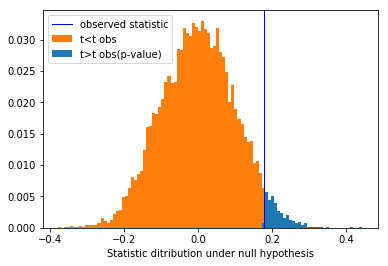

In [13]:
# Re-weight to obtain distribution
weights = np.ones(perms.shape[0]) / perms.shape[0]
plt.hist([perms[perms >= perms[0]], perms], histtype='stepfilled', 
        bins= 100, label=["t>t obs(p-value)", "t<t obs"],
        weights = [weights[perms >= perms[0]], weights])

plt.xlabel("Statistic ditribution under null hypothesis")
plt.axvline(x = perms[0], color='blue', linewidth=1, label="observed statistic")
_ = plt.legend(loc="upper left")

# One-tailed emperical p-value
pval_perm = np.sum(perms >= perms[0]) / perms.shape[0]

# Compare with Pearson's correlation test
_, pval_test = stats.pearsonr(x, y)

print("Permutation two tailed p-value=%.5f. Pearson test p-value=%.5f" % (2*pval_perm, pval_test))

# Bootstrapping

Botstraping is a random sampling with replacement strategy which porvides a non-parametric method to assess the variability of performances scores such __standard errors or confidence internvals__.


In [14]:
import numpy as np
from sklearn import datasets
import sklearn.linear_model as lm
import sklearn.metrics as metrics
import pandas as pd
# Regression dataset
n_features = 5
n_features_info = 2
n_samples = 100
X = np.random.randn(n_samples, n_features)
beta = np.zeros(n_features)
beta[:n_features_info] = 1
Xbeta = np.dot(X, beta)
eps = np.random.randn(n_samples)
y = Xbeta + eps

In [15]:
# Fit model on all data (!! risk of overfit)
model = lm.RidgeCV()
model.fit(X, y)
print("Coefficients on all data:")
print(model.coef_)

Coefficients on all data:
[ 1.01094082  0.92410534 -0.07588245  0.13848944  0.19659906]


In [16]:
# Bootstrap loop
nboot = 100 # !! Should be at least 1000
scores_names = ["r2"]
scores_boot = np.zeros((nboot, len(scores_names)))
coefs_boot = np.zeros((nboot, X.shape[1]))

orig_all = np.arange(X.shape[0])
for boot_i in range(nboot):
    boot_tr = np.random.choice(orig_all, size=len(orig_all), replace=True)
    boot_te = np.setdiff1d(orig_all, boot_tr, assume_unique=False)
    Xtr, ytr = X[boot_tr, :], y[boot_tr]
    Xte, yte = X[boot_te, :], y[boot_te]
    model.fit(Xtr, ytr)
    y_pred = model.predict(Xte).ravel()
    scores_boot[boot_i, :] = metrics.r2_score(yte, y_pred)
    coefs_boot[boot_i, :] = model.coef_


In [18]:
# Compute Mean, SE, CI
scores_boot = pd.DataFrame(scores_boot, columns=scores_names)
scores_stat = scores_boot.describe(percentiles=[.99, .95, .5, .1, .05, 0.01])

print("r-squared: Mean=%.2f, SE=%.2f, CI=(%.2f %.2f)" %\
      tuple(scores_stat.ix[["mean", "std", "5%", "95%"], "r2"]))

coefs_boot = pd.DataFrame(coefs_boot)
coefs_stat = coefs_boot.describe(percentiles=[.99, .95, .5, .1, .05, 0.01])
print("Coefficients distribution")
print(coefs_stat)


r-squared: Mean=0.59, SE=0.11, CI=(0.39 0.74)
Coefficients distribution
                0           1           2           3           4
count  100.000000  100.000000  100.000000  100.000000  100.000000
mean     1.007552    0.927999   -0.072079    0.166443    0.188892
std      0.105309    0.118476    0.092189    0.109172    0.089533
min      0.710004    0.676758   -0.331354   -0.059170   -0.043120
1%       0.787546    0.695238   -0.261349   -0.058613    0.001962
5%       0.835648    0.741149   -0.219243    0.009053    0.050575
10%      0.878441    0.775851   -0.202235    0.042002    0.079449
50%      1.013152    0.921445   -0.083346    0.167349    0.190600
95%      1.211640    1.108971    0.052410    0.352416    0.345560
99%      1.254097    1.180027    0.150143    0.383904    0.399238
max      1.290094    1.264742    0.153999    0.511701    0.401858


C:\Users\phhale\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """
